# Healthcare in Brazil: Investigate appointment attendance
Investigate a Dataset Project Submission  
Data Analyst Nanodegree Program  
Jessica Ertel  

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources">Resources</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project analyzes data associated with medical appointment attendance in Brazil, using a [Kaggle dataset](https://www.kaggle.com/joniarroba/noshowappointments) from May 2016. The analysis is concerned with the factors that cause patients to miss (not show up for) their scheduled appointment. Identifying any potential relationships in the data may indicate opportunities to make the healthcare system more efficient and accessible to Brazilians and minimize financial burdens on the healthcare industry.

The investigation is focused on answering two overarching research questions about patient's attendance rates in May 2016:
> Does the age or gender of a patient have an impact on appointment attendance?   
> Do chronic illnesses or health conditions like hipertension, diabetes, alcoholism, or handicaps affect patient absences?

This project focuses on evaluating whether there is a relationship between the dependent variable (appointment attendance) and the independent variables (age, gender, ailment).

<a id='wrangling'></a>
## Data Wrangling

This section is composed of three subsections, including general properties, initial observations and data cleaning. To begin this investigation, I imported the dataset and checked for cleanliness to prepare the data for analysis. This involved identifying general properties, such as the presence of null values, duplicates and unique values. I also identified the datatypes for values in each column. Finally, I clean the dataset in preparation for the exploratory analysis and development of visualizations.

### General Properties

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016 (1).csv')

In [2]:
# Inspect the dataframe
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
# Inspect the datatypes of features in the dataset and confirm presence of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# Check for unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
# Observation: the handicap column tracks a range rather than y/n values
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# Understand gender breakdown by percentage
gender_count = df.groupby('Gender').AppointmentID.count()

female_percentage = gender_count[0] / (gender_count[0] + gender_count[1])
female_percentage

0.6499769287142508

### Initial Observations of the Dataset

The dataset is composed of 110,527 rows, or appointments, and 14 columns. The columns contain additional details about the patient, such as whether they suffer from hipertension, diabetes, alcoholism or are handicapped. The columns provide detail on the patients age and gender, as well as whether they are enrolled in the Brazilian welfare program Bolsa Familia. This sample population has an average age of 37 years old and is approximately 65% female, 35% male.

Finally, there are columns that specify the date and time the appointment was scheduled, the location of the hospital, whether the patient received an SMS notification and whether they attended the appointment. There are a total of 62,299 different patients who scheduled appointments across 27 days. The total timeframe for when these appointments were made can be determined once the data is cleaned. Given this information, it appears that some patients scheduled multiple appointments within this time period.

### Data Cleaning
Fortunately, none of the features contain null values or duplicates. Four areas will be addressed in the data cleaning phase:
1. Some of the column names contain typos and will be updated to improve clarity. 
2. The current datatype of the columns containing the appointment date and scheduled date will be coverted to the datetime datatype.
3. The Missed_apt column will be changed from strings of Yes/No to integers of 1/0 so that masks can be created for the exploratory analysis phase.
4. Remove any patients with a negative age (i.e -1) from the dataset.

In [10]:
# Rename two columns to improve clarity
df.rename(columns = {'Handcap':'Handicap', 'No-show':'Missed_apt'}, inplace=True)

In [11]:
# Convert 'ScheduledDay' and 'AppointmentDay' columns to the datetime datatype
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x:x.strftime('%Y-%m-%d'))

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Missed_apt
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# Change 'Missed_apt' values from strings of Yes/No to integers of 1/0
df.Missed_apt.replace(('Yes', 'No'), (1, 0), inplace=True)

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Missed_apt
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [13]:
# Confirm datatype is an integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
Missed_apt        110527 non-null int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(9), object(3)
memory usage: 11.8+ MB


In [14]:
# Drop all rows with patients under the age of zero.
df.drop(df[df.Age < 0].index, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

Now that the data has been cleaned and trimmed, it's time to explore the research questions posed in the Introduction section. The dependent variable in this analysis is whether patients attended their appointment, which will be indicated by the "Missed_apt" column. The independent variables are the patient's age, gender and whether they suffer from a condition or ailment, specifically "hipertension", "diabetes", "alcoholism" or a "handicap".

### Research Question 1: *What is the relationship between age/gender and appointment attendance?*

To understand the relationship between age and appointment attendence, I focus on investigating whether a certain age group missed more appointments than others. I analyze the relationship between age and appointment attendance in two ways. The histogram illustrates the distribution of appointment attendance (whether an individual attended or missed their appointment) per patient age. The scatter plot illustrates patient attendance rate per age group.

To understand the relationship between gender and appointment attendance, I investigate whether there are more females or males missing appointments. I create variables to hold the total count of males and females in my sample and use this to calculate the total count patients that missed or attended appointments for each gender. The data is visualized with a pie chart.

__Are certain age groups are missing more appointments than others?__

In [15]:
# Create masks for the rows where patients did and did not attend their appointment
attended = df.Missed_apt == False
missed = df.Missed_apt == True

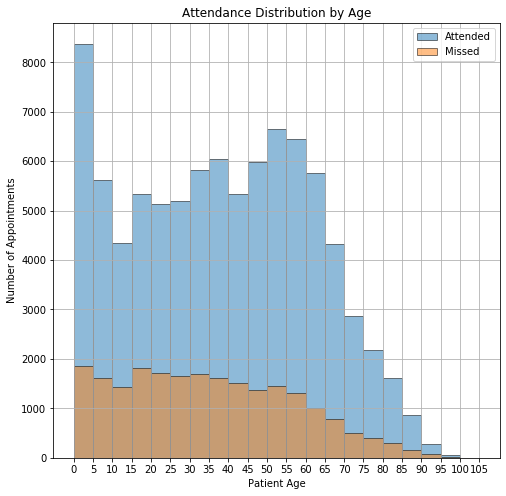

In [16]:
bins = np.arange(0,110, step = 5)

df.Age[attended].hist(alpha=0.5, bins=bins, label='Attended', figsize=[8,8], edgecolor="black")
df.Age[missed].hist(alpha=0.5, bins=bins, label='Missed', figsize=[8,8], edgecolor="black")
plt.title("Attendance Distribution by Age")
plt.xlabel("Patient Age")
plt.ylabel("Number of Appointments")
plt.legend()
plt.xticks(np.arange(0, 110, step=5));

__What percentage of appointments are attended per age group?__

In [17]:
# Create age categories to group patients
categorize = df.groupby(['Age'])['Age'].count()
categorize

Age
0      3539
1      2273
2      1618
3      1513
4      1299
       ... 
98        6
99        1
100       4
102       2
115       5
Name: Age, Length: 103, dtype: int64

In [39]:
age_groups = categorize.index.values
age_groups

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

In [19]:
# Determine how many age groups in total
len(age_groups)

103

In [50]:
# Create a count for missed/attended appointments by age group
groupby_age_apt = df.groupby(['Age','Missed_apt'])['Age'].count()
groupby_age_apt

Age  Missed_apt
0    0             2900
     1              639
1    0             1858
     1              415
2    0             1366
                   ... 
99   0                1
100  0                4
102  0                2
115  0                2
     1                3
Name: Age, Length: 203, dtype: int64

In [51]:
# Calculate total missed appointments per age group
not_attended_ages = df.groupby(['Age'])['Missed_apt'].apply(lambda x: (x==1).sum())

In [52]:
# Calculate total attended appointments per age group
attended_ages = df.groupby(['Age'])['Missed_apt'].apply(lambda x: (x==0).sum())

In [53]:
# Calculate attendance rate in percentage per age group (total attended divided by total patients)
attendance_rate = (attended_ages / (not_attended_ages + attended_ages)) * 100
attendance_rate

Age
0       81.944052
1       81.742191
2       84.425216
3       81.692003
4       78.290993
          ...    
98      83.333333
99     100.000000
100    100.000000
102    100.000000
115     40.000000
Name: Missed_apt, Length: 103, dtype: float64

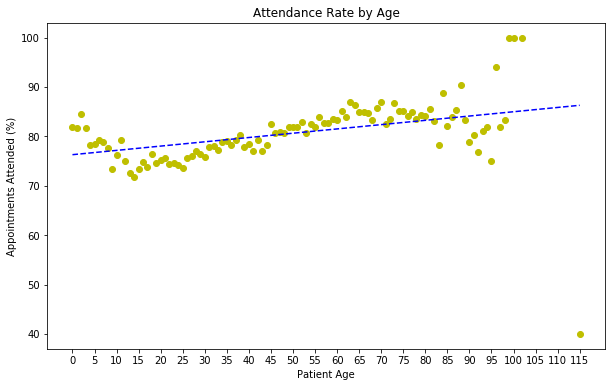

In [54]:
# Create a scatter plot to illustrate attendance rate by age

x = age_groups
y = attendance_rate.values
plt.figure(figsize=(10,6))

plt.scatter(x, y, color='y')
plt.title("Attendance Rate by Age")
plt.xlabel("Patient Age")
plt.ylabel("Appointments Attended (%)")
plt.xticks(np.arange(0, 120, step=5))
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'b--');

__Do men or women have a higher attendance rate?__

In [26]:
# Recall the total count of patients for each gender
gender_count

Gender
F    71840
M    38687
Name: AppointmentID, dtype: int64

In [27]:
# Calculate the total number of female patients
count_females = gender_count[0]

In [28]:
# Calculate number of females that missed their appointment
# Calculate number of females that attended their appointment

df_missed_females = df[(df.Gender == 'F') & (df.Missed_apt == 1)]

count_missed_females = df_missed_females['Missed_apt'].count()

count_attended_females = count_females - count_missed_females

In [29]:
# Calculate the total number of male patients
count_males = gender_count[1]

In [30]:
# Calculate number of males that missed their appointment
# Calculate number of males that attended their appointment

df_missed_males = df[(df.Gender == 'M') & (df.Missed_apt == 1)]

count_missed_males = df_missed_males['Missed_apt'].count()

count_attended_males = count_males - count_missed_males

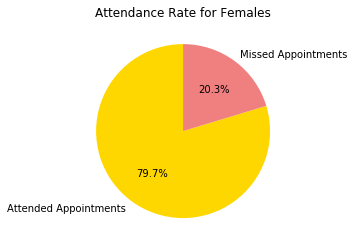

In [31]:
# Create a pie chart to illustrate the difference for females

labels = "Attended Appointments", "Missed Appointments"
sizes = [count_attended_females, count_missed_females]
colors = ['gold', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%.01f%%', startangle=90)
plt.title("Attendance Rate for Females");

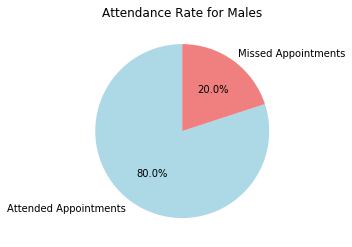

In [32]:
# Create a pie chart to illustrate the difference for males

labels = "Attended Appointments", "Missed Appointments"
sizes = [count_attended_males, count_missed_males]
colors = ['lightblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%.01f%%', startangle=90)
plt.title("Attendance Rate for Males");

### Research Question 2: *Do chronic illness or health conditions like hipertension, diabetes, alcoholism, or handicaps affect patient absences?*


What additional circumstances might determine whether patients show up for their appointments? To evaluate the relationship, I focus on the attendance rates of patients that suffer from any of the four conditions listed in the dataset. I plot the results on a grouped bar chart so that attendance can be analyzed within each category and then compared across all four.

In [33]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Missed_apt
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [34]:
# Create a dataframe for the patients suffering from each condition
# Then create variables containing total count of patients that missed and attended appointments

hipertension_patients = df[df['Hipertension'] == 1]
hipertension_attended = hipertension_patients[(hipertension_patients['Missed_apt'] == 0)].PatientId.count()
hipertension_missed = hipertension_patients[(hipertension_patients['Missed_apt'] == 1)].PatientId.count()

diabetes_patients = df[df['Diabetes'] == 1]
diabetes_attended = diabetes_patients[(diabetes_patients['Missed_apt'] == 0)].PatientId.count()
diabetes_missed = diabetes_patients[(diabetes_patients['Missed_apt'] == 1)].PatientId.count()

alcoholism_patients = df[df['Alcoholism'] == 1]
alcoholism_attended = alcoholism_patients[(alcoholism_patients['Missed_apt'] == 0)].PatientId.count()
alcoholism_missed = alcoholism_patients[(alcoholism_patients['Missed_apt'] == 1)].PatientId.count()

handicap_patients = df[df['Handicap'] == 1]
handicap_attended = handicap_patients[(handicap_patients['Missed_apt'] == 0)].PatientId.count()
handicap_missed = handicap_patients[(handicap_patients['Missed_apt'] == 1)].PatientId.count()


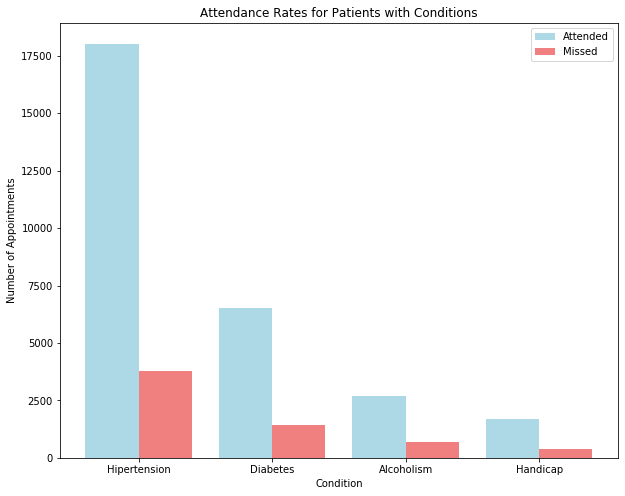

In [35]:
# Create a grouped bar chart to illustrate attendance for patients with each condition

conditions_attended = (hipertension_attended, diabetes_attended, alcoholism_attended, handicap_attended)
conditions_missed = (hipertension_missed, diabetes_missed, alcoholism_missed, handicap_missed)

index = np.arange(4)
bar_width = 0.4

fig, ax = plt.subplots(figsize=(10, 8))

plot_attended = ax.bar(index, conditions_attended, bar_width, label='Attended', color='lightblue')

plot_missed = ax.bar(index + bar_width, conditions_missed, bar_width, label='Missed', color='lightcoral')

ax.set_xlabel('Condition')
ax.set_ylabel('Number of Appointments')
ax.set_title('Attendance Rates for Patients with Conditions')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Hipertension", "Diabetes", "Alcoholism", "Handicap"])
ax.legend();

<a id='conclusions'></a>
## Conclusions

### Results
**Age**  

According the the "Attendance Distribution by Age" histogram, the highest number of appointments are scheduled for patients under the age of 5. This age group has the highest number of attended appointments, although it's unlikely these individuals are responsible for attendance; they are likely accompanied by adults. Less appointments are scheduled for patients between the ages of 10-15 and "Attendance Rate by Age" scatterplot indicates a lower percentage of appointments are attended.

The number of missed appointments is relatively consistent for patients between the ages of 10-30 years old. Overall a lower number of appointments are scheduled for this group. This could be attributed to the fact that these generations are generally balancing many competing life responsibilities and suffer from less serious health conditions. Another explanation for these patterns could be the relative importance of health care respective to age. Medical appointments may be more critical for the very old and very young age groups, wheras those between 10-30 years old may be more inclined to skip an appointment. Therefore, we see a positive trend in appointment attendance rates as age increases.

**Gender**  

There are almost double the number of scheduled appointments for females in this dataset. However, the "Attendance Rates for Females/Males" pie charts illustrate that *both males and females* missed approximately 20% of the appointments they scheduled. While the sheer number of female appointments might indicate women place greater importance on health than men, the available data indicates no apparent relationship between a patient's gender and their history of appointment attendance.  

**Health Conditions**  

Are chronic illnesses or health conditions a prominant factor in patient absences? Of all the health conditions included in this dataset, the highest number of patients in this study (apprx 22,000) suffer from hipertension. Therefore, it is not surprising that the highest number of attended and the highest number of missed appointments across all the conditions are in the hipertension category. When analyzing each condition in isolation, patients suffering from alcoholism have the highest no-show rate with approximately 25% of alcoholic patients having missed appointments. Despite this statistic, there is insufficient data available to assume this condition was the cause of the missed appointment. The no-show rate for the other health condition categories is around 21-22%.

### Limitations

Most of the data in this dataset is categorical, which prevents the application of statistical methods and makes it challenging to see strong correlation between variables. Fortunately, null or missing values did not adversely factor into this analysis. However, there was some questionable data collected on patient ages. Patients under the age of 0 were removed, but a few patients over the age of 100 years old were included in the analysis. Ages at the extreme ends of the spectrum are notable in that these patients would likely be accompanied by another individual, who would hold responsibility for ensuring that the patient makes it to the appointment. Without information about whether patients were accompanied or details about that individual, limited conclusions can be drawn about the reasons behind appointment attendance. 

An analysis of the dates and times where patients missed the most appointments would be an interesting element of this study. Unfortunately, the data only covers appointments across 27 days in one month so it would be difficult to deduct conclusions without understanding how the system functions for the other 11 months of the year.

<a id='resources'></a>
## Resources

A special thanks to my Nanodegree Mentor and Myles C. for their guidance in preparing the visualizations in this analysis.

https://hub.udacity.com/rooms/community:nd002:en-us-general/community:thread-30ea030a-c4af-11e9-a3cf-4bd6f7e90ada-1940224?contextType=room

https://hub.udacity.com/rooms/community:nd002:en-us-general/community:thread-30ea030a-c4af-11e9-a3cf-4bd6f7e90ada-1875876?contextType=room

https://stackoverflow.com/questions/44076203/getting-percentages-in-legend-from-pie-matplotlib-pie-chart?rq=1

https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html

https://www.pythoncharts.com/2019/03/26/grouped-bar-charts-matplotlib/